In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


caminho = './desafio_indicium_imdb.csv'
df = pd.read_csv(caminho)

df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'])

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [6]:

# ---Sucesso financeiro e crítico---
print("---Analise entre o sucesso financeiro e crítico---")
correlation_matrix = df[['Gross','IMDB_Rating', 'Meta_score']].corr()
print(correlation_matrix)
print("\n")

---Analise entre o sucesso financeiro e crítico---
                Gross  IMDB_Rating  Meta_score
Gross        1.000000     0.099393   -0.030480
IMDB_Rating  0.099393     1.000000    0.271374
Meta_score  -0.030480     0.271374    1.000000




In [37]:
#---Analise de Impacto dos Diretores e Atores---
print("---Analise de Impacto dos Diretores---")
diretor_analysis = df.groupby('Director').agg(
    Media_gross = ('Gross', 'mean'),
    Media_imdb = ('IMDB_Rating', 'mean'),
    Quantidade_filmes = ('Director', 'count')
).sort_values(by= 'Media_gross', ascending = False)
print(diretor_analysis)
print("\n")

print("---Analise de Impacto dos Atores---")
actor_df = df.melt(id_vars=['Gross', 'IMDB_Rating'], value_vars=['Star1', 'Star2', 'Star3', 'Star4'], var_name='Star_Position', value_name='Actor')

actor_analysis = actor_df.groupby('Actor').agg(
    Media_gross=('Gross', 'mean'),
    Media_imdb_ator=('IMDB_Rating', 'mean')
).sort_values(by='Media_gross', ascending=False)

actor_analysis['Media_gross'] = actor_analysis['Media_gross'].map('${:,.2f}'.format)

print(actor_analysis)
print("\n")


---Analise de Impacto dos Diretores---
                   Media_gross  Media_imdb  Quantidade_filmes
Director                                                     
Anthony Russo     5.512599e+08    8.075000                  4
Gareth Edwards    5.321773e+08    7.800000                  1
J.J. Abrams       4.743903e+08    7.833333                  3
Josh Cooley       4.340380e+08    7.800000                  1
Roger Allers      4.227838e+08    8.500000                  1
...                        ...         ...                ...
Yavuz Turgul               NaN    8.200000                  1
Yilmaz Erdogan             NaN    8.000000                  1
Yoshifumi Kondô            NaN    7.900000                  1
Çagan Irmak                NaN    8.300000                  1
Ömer Faruk Sorak           NaN    8.000000                  1

[548 rows x 3 columns]


---Analise de Impacto dos Atores---
                        Media_gross  Media_imdb_ator
Actor                                   

In [10]:
#---Analise de engajamento do público---
print("---Analise de engajamento do público---")
engajamento_analysis = df[['No_of_Votes', 'Gross', 'IMDB_Rating']].corr()
print(engajamento_analysis)
print("\n")

---Analise de engajamento do público---
             No_of_Votes     Gross  IMDB_Rating
No_of_Votes     1.000000  0.589527     0.479308
Gross           0.589527  1.000000     0.099393
IMDB_Rating     0.479308  0.099393     1.000000




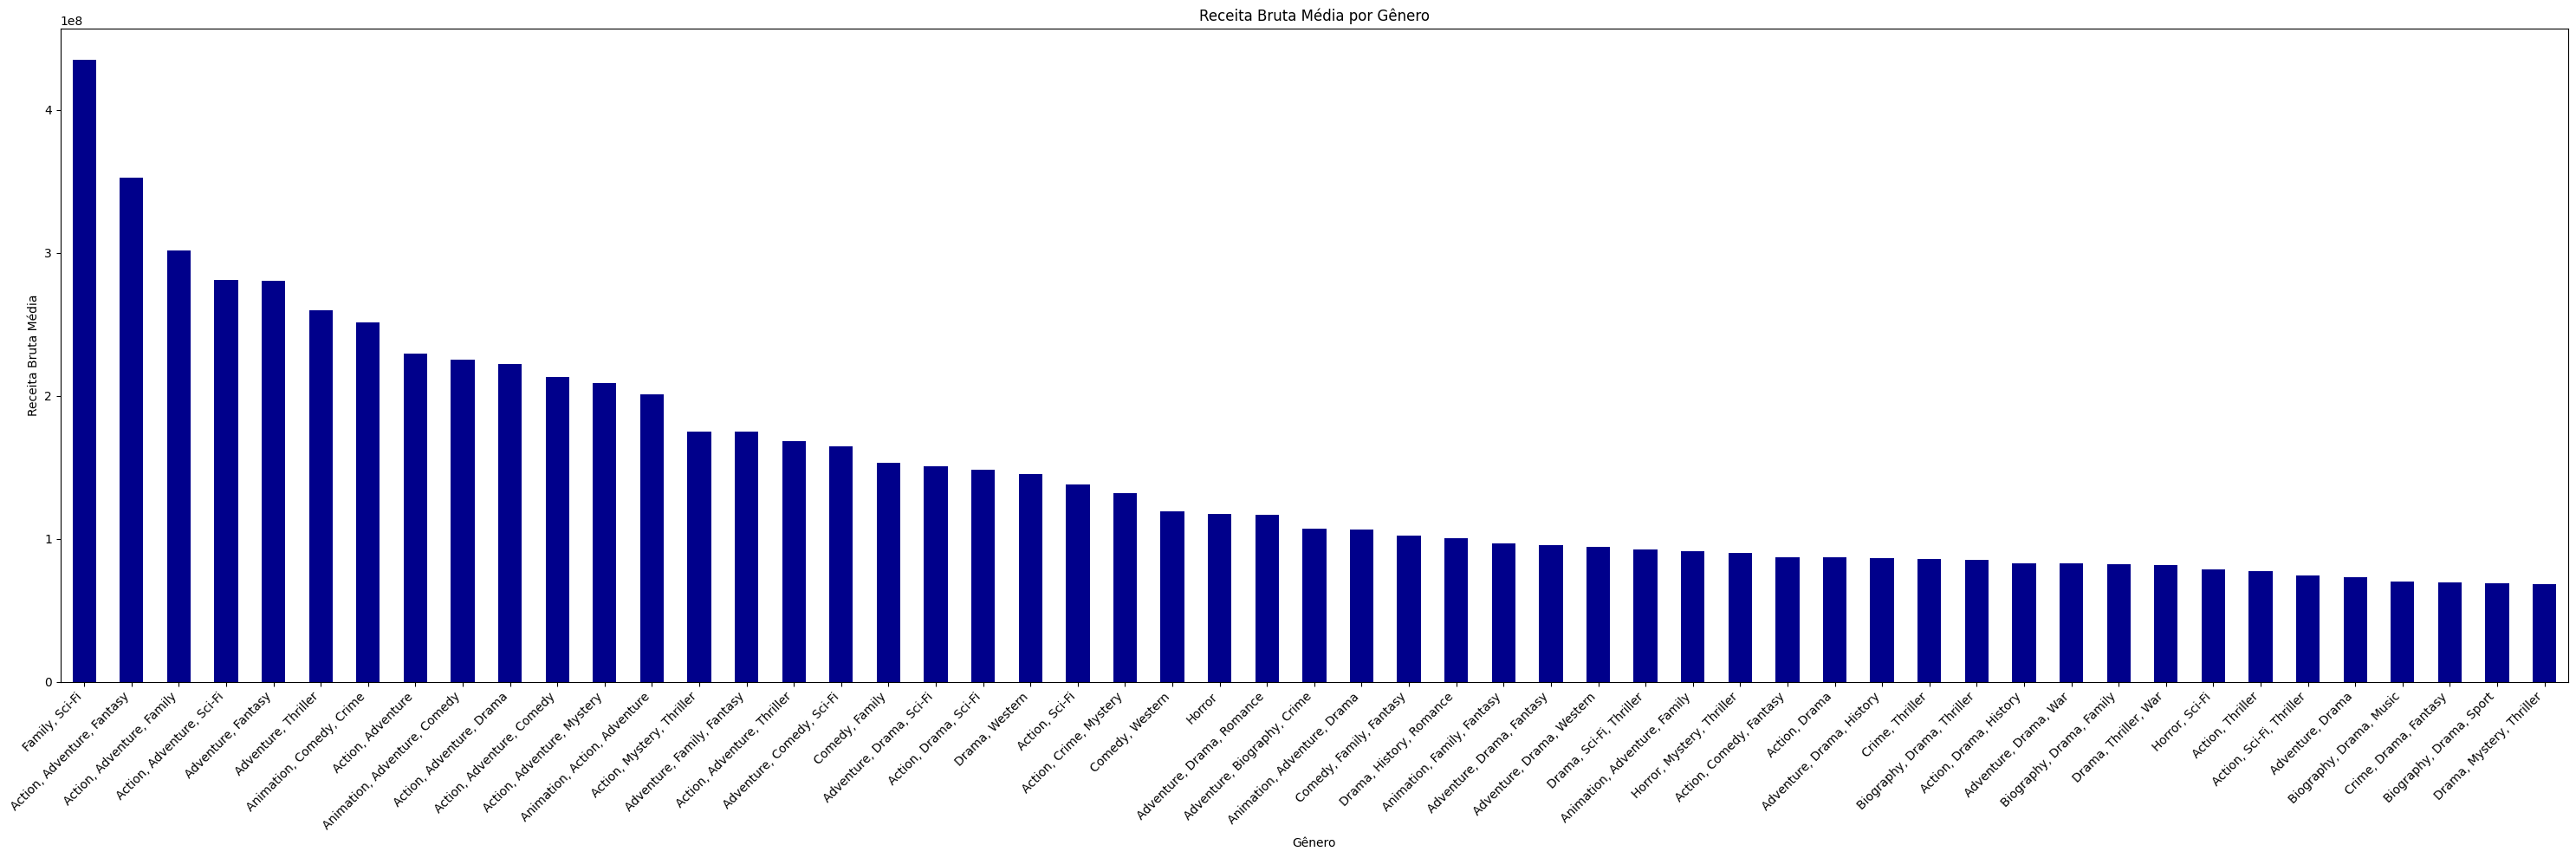

Média geral de receita bruta: $68,082,574.10


In [11]:
#---Gráfico Receita bruta por genero---
media_gross = df['Gross'].mean()
genero_gross_analysis = df.groupby('Genre')['Gross'].mean()
generos_acima = genero_gross_analysis[genero_gross_analysis > media_gross]

plt.figure(figsize=(30,10))
generos_acima.sort_values(ascending=False).plot(kind='bar', color='darkblue')
plt.title('Receita Bruta Média por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Receita Bruta Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('receita_bruta_por_genero.png')
plt.show()

#media geral ref
print(f"Média geral de receita bruta: ${media_gross:,.2f}")

In [47]:
api_key = 'e67b87c6b7ba3ef027470ce791cbadcc'

titulo_do_filme = "The Dark Knight"

url_busca = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={titulo_do_filme}"
resposta_busca = requests.get(url_busca)
dados_busca = resposta_busca.json()

if dados_busca['results']:
    # Pega o ID do primeiro resultado da busca
    filme_id = dados_busca['results'][0]['id']
    print(f"ID do filme '{titulo_do_filme}': {filme_id}")

    # --- Passo 2: Usar o ID para obter os detalhes (incluindo orçamento) ---
    url_detalhes = f"https://api.themoviedb.org/3/movie/{filme_id}?api_key={api_key}"
    resposta_detalhes = requests.get(url_detalhes)
    dados_detalhes = resposta_detalhes.json()

    # Exibe as informações de custo
    print(f"\nDetalhes do filme '{dados_detalhes['title']}':")
    print(f"Orçamento: ${dados_detalhes.get('budget'):,}")
    print(f"Receita Bruta: ${dados_detalhes.get('revenue'):,}")

else:
    print(f"Filme '{titulo_do_filme}' não encontrado.")

ID do filme 'The Dark Knight': 155

Detalhes do filme 'The Dark Knight':
Orçamento: $185,000,000
Receita Bruta: $1,004,558,444
